In [16]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
from census import Census
import gmaps

In [17]:
import pandas as pd

# data with number of passenger rides
L_Rides = pd.read_csv('Resources/CTA-L-Monthly-Ridership.csv')

#This is a list of stations with zipcode and location for plotting
stop_List = pd.read_csv('Resources/CTA-List_of_L_Stops.csv')
#stop_List

In [18]:
#converting to datetime using pandas 
L_Rides['date_time'] = pd.to_datetime(L_Rides['month_beginning'])

In [19]:
# Checking data
stop_List.columns

Index(['STOP_ID', 'DIRECTION_ID', 'STOP_NAME', 'STATION_NAME',
       'STATION_DESCRIPTIVE_NAME', 'MAP_ID', 'ADA', 'RED', 'BLUE', 'G', 'BRN',
       'P', 'Pexp', 'Y', 'Pnk', 'O', 'Location', 'Historical Wards 2003-2015',
       'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards'],
      dtype='object')

In [20]:
stop_List['Location']

0      (41.857908, -87.669147)
1      (41.857908, -87.669147)
2      (41.829353, -87.680622)
3      (41.829353, -87.680622)
4      (41.831677, -87.625826)
                ...           
295    (41.964273, -87.657588)
296     (41.88322, -87.626189)
297    (41.964273, -87.657588)
298    (41.885269, -87.666969)
299    (41.885269, -87.666969)
Name: Location, Length: 300, dtype: object

In [21]:
#Splitting coordinates from stop list df
new_Location = stop_List['Location'].str.split(",", n = 1, expand = True) 

In [22]:
print(new_Location[0].str[1:], new_Location[1].str[1:11])

0      41.857908
1      41.857908
2      41.829353
3      41.829353
4      41.831677
         ...    
295    41.964273
296     41.88322
297    41.964273
298    41.885269
299    41.885269
Name: 0, Length: 300, dtype: object 0      -87.669147
1      -87.669147
2      -87.680622
3      -87.680622
4      -87.625826
          ...    
295    -87.657588
296    -87.626189
297    -87.657588
298    -87.666969
299    -87.666969
Name: 1, Length: 300, dtype: object


In [23]:
# making separate lattitude column from new Location data frame 
stop_List["Latitude"]= new_Location[0].str[1:] 
  
# making separate Longitude column from new Location data frame 
stop_List["Longitude"]= new_Location[1].str[1:11]

In [24]:
stop_List.columns

Index(['STOP_ID', 'DIRECTION_ID', 'STOP_NAME', 'STATION_NAME',
       'STATION_DESCRIPTIVE_NAME', 'MAP_ID', 'ADA', 'RED', 'BLUE', 'G', 'BRN',
       'P', 'Pexp', 'Y', 'Pnk', 'O', 'Location', 'Historical Wards 2003-2015',
       'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards', 'Latitude',
       'Longitude'],
      dtype='object')

In [26]:
#render dataframe as html
#stop_List_html = stop_List.to_html()

#write html to file
#stop_List_file = open("Resources/stop_list.html", "w")
#stop_List_file.write(stop_List_html)
#stop_List_file.close()

In [25]:
#L_Rides_html = L_Rides.to_html()

#write html to file
#L_Rides_file = open("Resources/L_Rides.html", "w")
#L_Rides_file.write(L_Rides_html)
#L_Rides_file.close()

In [27]:
# Using geopandas to find Nearest stations to my apt
# My address is at 41.940330, -87.640446

home_lat = 41.940330
home_long = -87.640446

In [28]:
# from geopandas documentation and GeoPandas AutoGIS
#!pip install shapely
#!pip install geopandas

from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

# define origing (in this case my address)
orig = Point(home_lat, home_long)

#Multipoint is the list of the location

destinations = MultiPoint(stop_List['Location'])

ModuleNotFoundError: No module named 'shapely'

In [ ]:

Fullerton_Rides_total = L_Rides[(L_Rides['stationame'] == 'Fullerton')]

Fullerton_Rides_2019 = L_Rides[(L_Rides['stationame'] == 'Fullerton') &
                       (L_Rides['date_time'] >= '01/01/2019') &
                       (L_Rides['date_time'] < '06/30/2019')]

In [29]:
Station_Group = L_Rides.groupby(['stationame'])
#Station_Group.groups

In [30]:
Station_Group['monthtotal'].sum()

stationame
18th                    8601327
35-Bronzeville-IIT     12274103
35th/Archer            15275681
43rd                    5633804
47th-Dan Ryan          17599600
                         ...   
Western-Cermak          5369566
Western-Forest Park     8266947
Western-Orange         19636487
Western/Milwaukee      25044551
Wilson                 33472920
Name: monthtotal, Length: 148, dtype: int64

In [32]:
Station_Totals = pd.DataFrame(Station_Group['monthtotal'].sum())
Station_Totals.sort_values(ascending=False,by='monthtotal',inplace=True)
Station_Totals.head(10)

,monthtotal
stationame,
Clark/Lake,94794425
Lake/State,94243224
Chicago/State,87346160
95th/Dan Ryan,70730114
Belmont-North Main,70676134
Fullerton,69351169
Grand/State,64770299
O'Hare Airport,62189240
Jackson/State,59450701


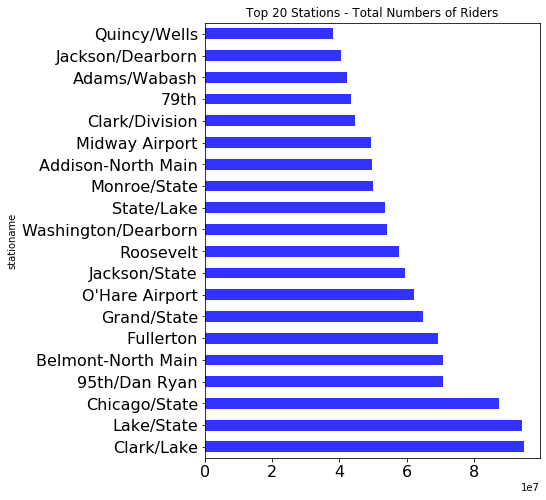

In [50]:
#PLotting of top 20 more busy CTA stations

Station_Totals.head(20).plot(kind='barh',
                             figsize = (6,8),
                             title = "Top 20 Stations - Total Numbers of Riders", 
                             color = 'blue', alpha = 0.8,
                             fontsize = 16,
                             legend = False,
                             rot=0)
plt.show()

In [ ]:
#PLotting of top 20 more busy CTA stations

Station_Totals.head(20).plot(kind='barh',title = "Top 20 Stations", color = 'green', alpha = 0.5, rot=0)

In [ ]:
Station_Totals.tail(20).plot(kind='barh',title = "Bottom 20 Stations", color = 'green', alpha = 0.5, rot=0)

In [ ]:
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()